# Simulating Stochastic Processes

## 1. Discrete time Markov Chain with finite state space
Let $\pi_t$ be the probability distribution at time t where $t = 0, 1, 2, \dots$. Let $\mathbb{P}$ be the $n\times n$ one step transition probability matrix. By the Komolgorov-Chapman theorem, $\pi_{t+1} = \pi_t\mathbb{P}$ and 

$$\pi_t = \pi_0\mathbb{P}^t$$

The limiting probability $\pi_\infty = \pi_\infty\mathbb{P}$. Thus, $\pi_\infty$ is the eigen vector of $\mathbb{P}^{'}$ for eigen value = 1. 

### Specify the states of the process

In [2]:
states = c("ATLANTA","CHICAGO","DC","NYC")
nstates = length(states)

### Initial Probability at time 0

In [3]:
pi_0 = c(1,0,0,0)

### Transition Probability Matrix

In [4]:
tranP = matrix(runif(nstates*nstates),nrow=nstates,ncol=nstates)
for(i in 1:nstates) tranP[i,] = tranP[i,]/sum(tranP[i,])

### The Probability distribution at time n

In [5]:
ntime = 20
pi_n = matrix(0,nrow=ntime,ncol=nstates)
tranP_n = diag(nstates)

for(n in 1:ntime){
    tranP_n = tranP %*% tranP_n
    pi_n[n,] = pi_0 %*% tranP_n
}

print("the probablity distribution at time n")
pi_n

print("the n-step transition probability matrix")
tranP_n

[1] "the probablity distribution at time n"


[,1]      [,2]       [,3]      [,4]     
 [1,] 0.3281724 0.07751043 0.2789093 0.3154079
 [2,] 0.2975096 0.18287464 0.2160885 0.3035273
 [3,] 0.2875323 0.17550260 0.2368997 0.3000655
 [4,] 0.2890999 0.17766139 0.2316274 0.3016113
 [5,] 0.2886103 0.17725435 0.2329756 0.3011597
 [6,] 0.2887281 0.17735363 0.2326395 0.3012788
 [7,] 0.2886983 0.17733003 0.2327231 0.3012486
 [8,] 0.2887056 0.17733583 0.2327024 0.3012561
 [9,] 0.2887038 0.17733440 0.2327075 0.3012543
[10,] 0.2887043 0.17733476 0.2327063 0.3012547
[11,] 0.2887042 0.17733467 0.2327066 0.3012546
[12,] 0.2887042 0.17733469 0.2327065 0.3012546
[13,] 0.2887042 0.17733468 0.2327065 0.3012546
[14,] 0.2887042 0.17733469 0.2327065 0.3012546
[15,] 0.2887042 0.17733469 0.2327065 0.3012546
[16,] 0.2887042 0.17733469 0.2327065 0.3012546
[17,] 0.2887042 0.17733469 0.2327065 0.3012546
[18,] 0.2887042 0.17733469 0.2327065 0.3012546
[19,] 0.2887042 0.17733469 0.2327065 0.3012546
[20,] 0.2887042 0.17733469 0.2327065 0.3012546

[1] "the n-step transition probability matrix"


[,1]      [,2]      [,3]      [,4]     
[1,] 0.2887042 0.1773347 0.2327065 0.3012546
[2,] 0.2887042 0.1773347 0.2327065 0.3012546
[3,] 0.2887042 0.1773347 0.2327065 0.3012546
[4,] 0.2887042 0.1773347 0.2327065 0.3012546

### Limiting probability distribution

In [17]:
pi = eigen(t(tranP))$vector[,1]
pi = pi/sum(pi)
pi

[1] 0.1718118+0i 0.4217976+0i 0.1555527+0i 0.2508379+0i

### Simulation


ATLANTA CHICAGO      DC     NYC 
   0.30    0.18    0.26    0.26 

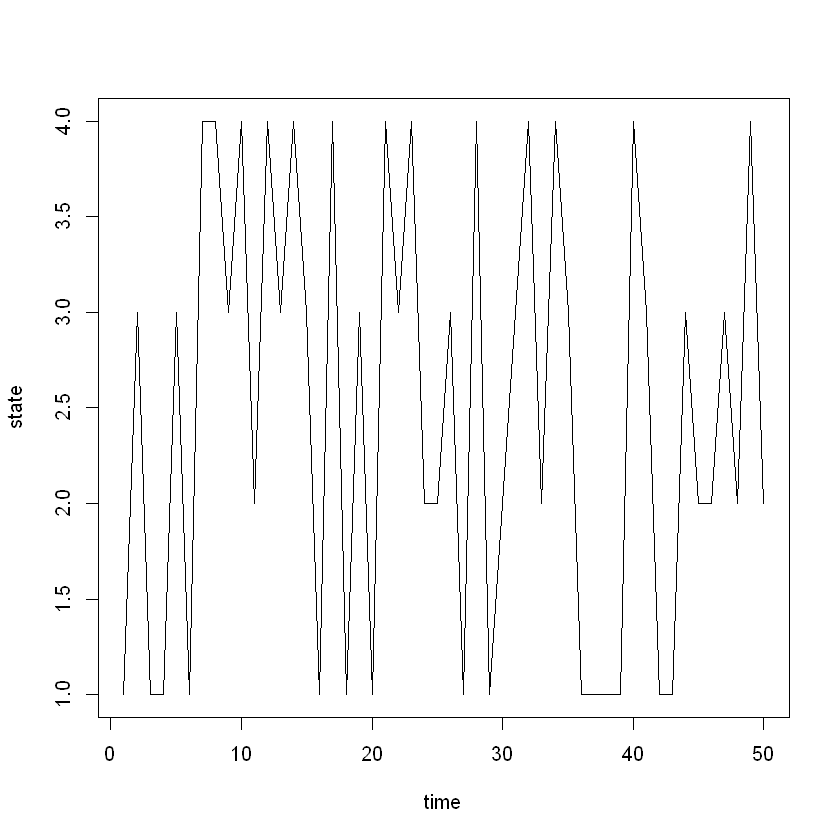

In [9]:
nsim = 50
x = rep(0,nsim)
x[1] = sample(1:nstates,1,prob = pi_0)
for(i in 2:nsim){
    x[i] = sample(1:nstates,1,prob = tranP[x[i-1],])
}

freq = table(states[x])
freq/sum(freq)

plot(1:nsim, x, xlab="time", ylab="state", type="l")
                  

### Animation

In [10]:
data = rbind(c(1,1),c(2,2),c(2,0),c(3,1))
data = data[x,]

In [11]:
library(plotly)

df <- data.frame(
  x = data[,1], 
  y = data[,2], 
  f = 1:nsim,
  s = states[x]
)

fig <- df %>%
  plot_ly(
    x = ~x,
    y = ~y,
    frame = ~f,
    type = 'scatter',
    mode = 'markers',
    color = I("blue"),
    size = I(50)
  )

t <- list(
  family = "sans serif",
  size = 18,
  color = toRGB("red"))

fig <- fig %>% add_text(x = data[,1],y=data[,2],text = states[x],textfont=t,textposition="top right")
fig <- fig %>% layout(xaxis = list(range = c(0, 4)), yaxis = list(range = c(0,3)), showlegend = FALSE)

fig


HTML widgets cannot be represented in plain text (need html)

## 2. Ransom walks
A random walk is a Markov chain with infinite state space. Let $\pi_t$ be the probability distribution at time $t$. Let  be the $n\times n$ one step transition probability matrix $\mathbb{P}$. The Kolmogorov-Chapman theorem still holds, i.e., 

$$\pi_{t+1} = \pi_t\mathbb{P}$$

This indicates that $\pi_{t+1}^i = \pi_t^{i-1}\times q + \pi_t^{i+1}\times p$

### Initial probability distribution

In [12]:
x[1] = 0

### Transition probability

In [13]:
tranP = function(current,p){
    return(ifelse(runif(1)<=p,current-1,current+1))
}

y = 1:10000
for(i in 1:10000) y[i] = tranP(3,0.5)
sum(y==2)

[1] 4980

### Simulation

In [107]:
nsim = 1000
t = 100
p = 0.5
x = matrix(0, nsim, t)
for(j in 1:nsim){
    for(i in 2:t){
        x[j,i] = tranP(x[j,i-1],p)
    }
}

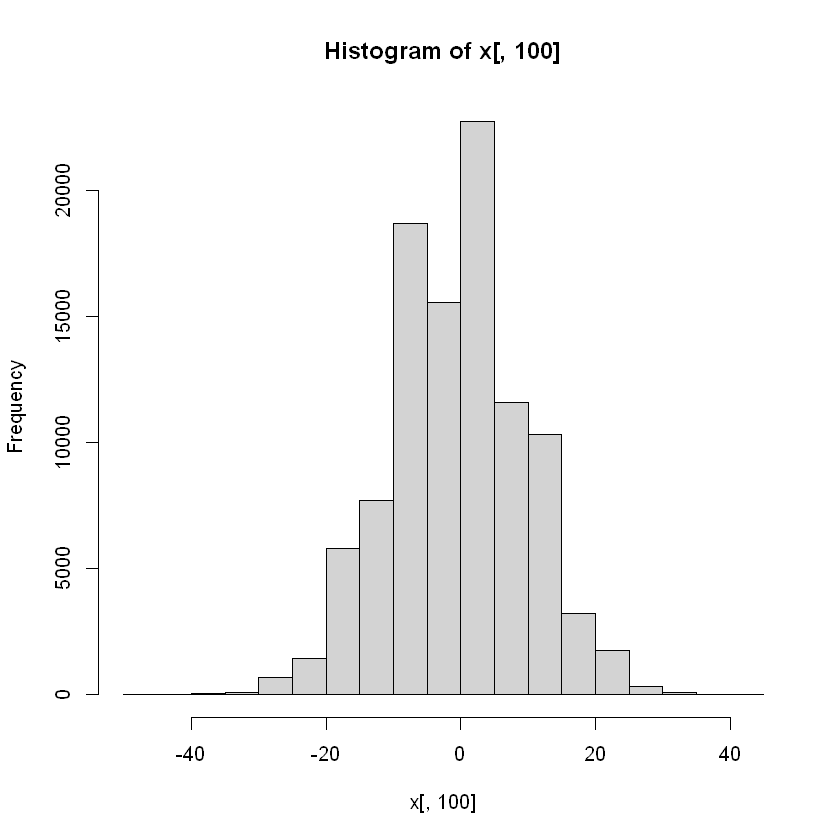

In [108]:
hist(x[,100])